# Data Preprocessing Template

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
# import Dataset
data = pd.read_csv("Data.csv")
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
X = data.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [4]:
y = data.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# missing data
[The link explain that's](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)

In [5]:
from sklearn.preprocessing import Imputer

In [6]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [7]:
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)#col
imputer = imputer.fit(X[: , 1:3])
X[: , 1:3] = imputer.transform(X[: , 1:3])
X

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encoding Categorical Data

In [8]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0]) # country neme
print(X)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


In [9]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]]


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [12]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

# feature scalling

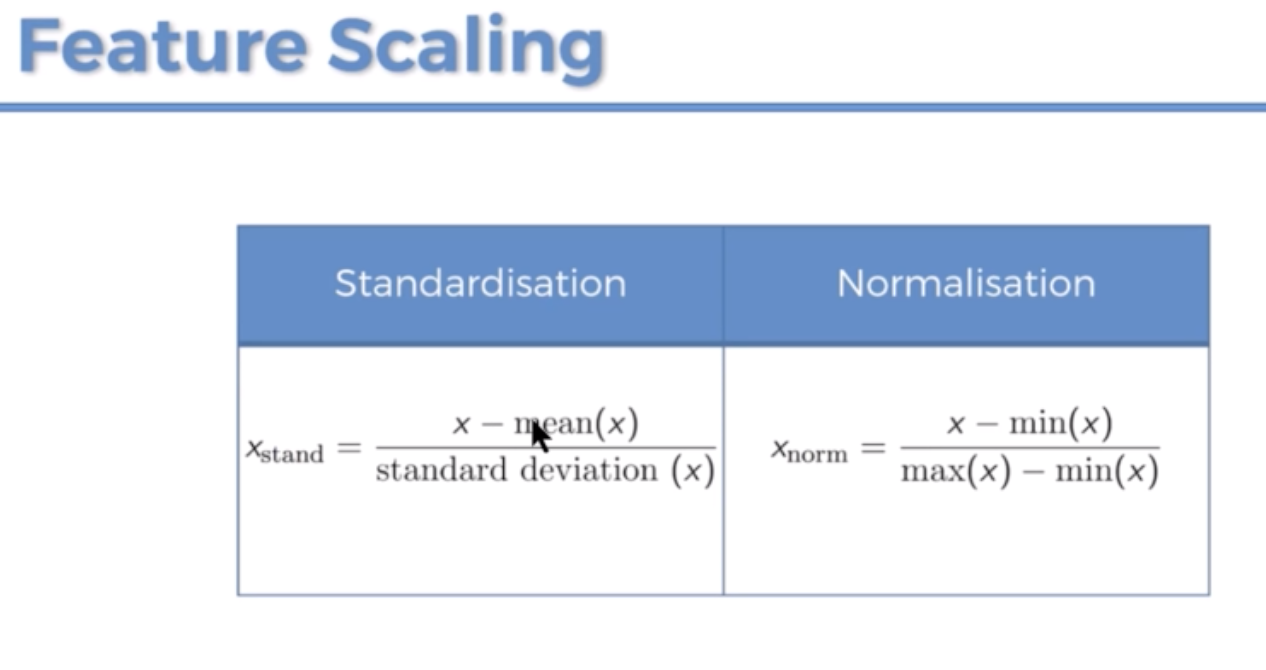

In [21]:
from IPython.display import Image
Image(filename='1.png')

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
print(X_train)
print('---------------')
print(X_test)

[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]
---------------
[[-1.          2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [-1.          2.64575131 -0.77459667  1.98496442  2.13981082]]


# preprocessing Data Template

In [26]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'